## Simple Implementation for the Linear Regression Algorithm

#### We will use 
    - Numpy for implementing the matrices ops
    - Matplotlib for visualizing
    - sklearn for generating toy data to play with


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [185]:

class LinearRegression(object):
    
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.errors = []
        self.b0_errors = []
        self.b1_errors = []
    def train(self, x, y,initial_b0 = 0, initial_b1 = 0, num_itrs = 100000, alpha = .01):
        '''
        using train function to do the gradient descent with some logs
        '''
        self.b0 = initial_b0
        self.b1 = initial_b1
        print("Starting gradient descent at b0 = {0}, b1 = {1}".format(self.b0, self.b1))
        print("Running...")
        self.gradient_descent(x,y, alpha, num_itrs)
        print("After {0} iterations b0 = {1}, b1 = {2}".format(num_itrs, self.b0, self.b1))
        print("errors moved from {0} to {1}".format(self.errors[0], self.errors[-1]))
    
    def predict(self, x, b0=None, b1=None):
        '''
        predicting the y using the current b0 and b1, with optional assignment for them
        
        '''
        if b0 == None or b1 == None:
            b0 = self.b0
            b1 = self.b1
        x = np.array(x)
        prediction = b0 + b1 * x
        return prediction
    
    def compute_cost(self, x, y):
        '''
        Comput cost for linear regression
        '''
        #Number of training samples
        m = len(y)

        predictions = self.predict(x)

        sq_errs = ((predictions - y) ** 2).sum()


        return sq_errs/(2*m)


    def gradient_descent(self, x, y, alpha, num_iters):
        '''
        preform the gradient descent to adjust b0 and b1
        '''
        self.b0 = 0
        self.b1 = 0
        m = len(y)
        self.errors = []
        for i in range(num_iters):

            predictions = self.predict(x, self.b0, self.b1)
            
            b0_grad = (1/m) * (predictions - y).sum()
            b1_grad = (1/m) * x.T.dot(predictions - y)
            
            self.b0 -= alpha * b0_grad
            self.b1 -= alpha * b1_grad

            self.errors.append(self.compute_cost(x,y))
            self.b0_errors.append(abs(b0_grad))
            self.b1_errors.append(abs(b1_grad))

        
    
    def plot_errors(self):
        plt.plot(self.errors)
        plt.show()
    
    def plot_b0_b1_errors(self):
        fig, axes = plt.subplots(ncols=2)
        axes[0].plot(self.b0_errors, label="b0 errors", )
        axes[1].plot(self.b1_errors, label="b1 errors")
        plt.show()
 



### using linear regression with simple small dataset

In [160]:
from sklearn.datasets import make_regression

In [186]:
x, y = make_regression(n_features=1,  n_samples=50, noise=10, bias=10)
x = x.flatten(1)

C:\Users\m_ashour\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  from ipykernel import kernelapp as app


In [128]:
y

array([ 23.37048257,  -2.43053725,  -9.33191698,   9.57053668,
        -9.76601753,   4.91361975,   3.22707067, -16.21701819,
        19.08203073,   8.3464077 ,   9.19822643,  20.40551252,
       -23.30653878,   4.36206703, -47.11135423,   4.03760461,
       -11.07195413,  -6.55742703, -15.64639282,   0.60121564,
        12.0410441 , -25.82232993,  26.13376412, -18.90714206,   2.61799682])

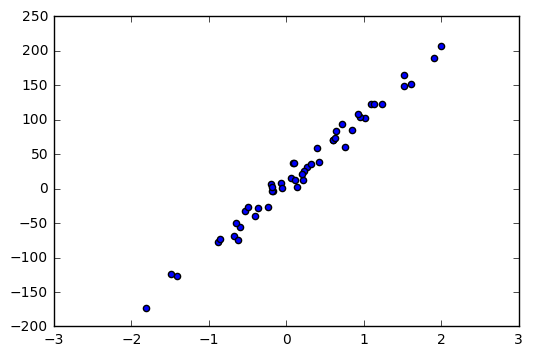

In [188]:
plt.scatter(x,y)
plt.show()

In [189]:
l_reg = LinearRegression()

In [190]:
l_reg.train(x,y,num_itrs=10000, alpha = .0015)
#l_reg.gradient_descent(x,y, num_iters=100, alpha=.005)

Starting gradient descent at b0 = 0, b1 = 0
Running...
After 10000 iterations b0 = 8.834955938320947, b1 = 96.88399582075861
errors moved from 3758.0912340197556 to 52.842670263204624


In [191]:
ypred = l_reg.predict(x)

In [192]:
sum(y)

1444.9798474705171

In [193]:
sum(ypred)

1445.0769497976632

In [194]:
for i in range(len(y)):
    print(y[i], ypred[i])

-69.2355924242 -56.2593818512
8.83283392493 2.80763400113
70.0937261839 67.6428250749
-74.3610832082 -51.9119678257
122.2274127 128.225361178
31.8659619873 34.5626411766
-3.87124882754 -8.24896847309
94.0347942171 77.9978419098
-55.298091494 -48.7036377433
15.0856152201 14.2679240764
37.0360310281 17.0236488785
-50.5107132745 -54.3389478349
152.203721318 165.340132456
102.482327901 106.734490396
84.791732059 91.1718624752
-28.1708975603 -26.0648724179
11.8883797999 19.2865374369
-32.9288468266 -42.7687149174
26.189016669 30.5072902906
6.73258496437 -9.87219120382
-126.855007347 -127.186732899
59.4710628291 46.8967947674
36.4166764032 40.0332502281
12.0376032498 29.082565074
70.0139293422 66.9700679772
207.147655918 201.91735009
-77.3386028672 -76.2400367185
72.9744329818 70.2735790763
38.8108708235 49.3231392571
-172.62048253 -167.16402454
122.62567969 114.93479161
36.6698658383 18.0006391429
2.6170918456 21.6802755538
60.0298942088 82.6290836569
103.428734059 101.230975179
-73.2637003

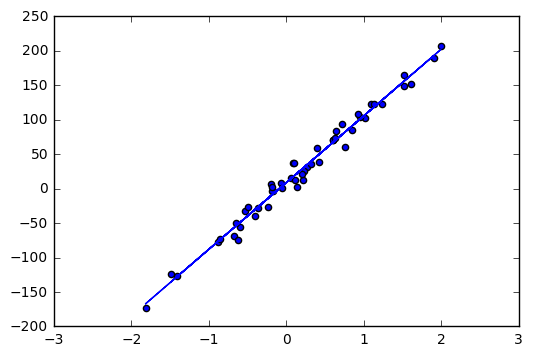

In [195]:
plt.scatter(x,y)
plt.plot(x,ypred)
plt.show()

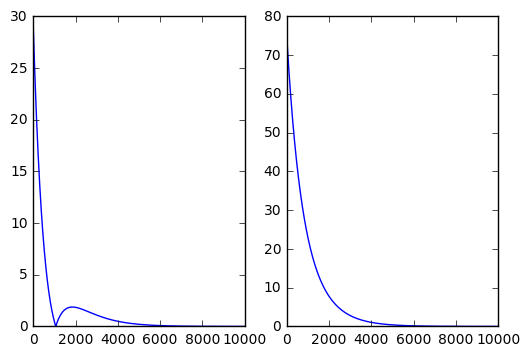

In [196]:
l_reg.plot_b0_b1_errors()

### More Noisy Data
Linear Regression isn't great for all the situations , it's great for simple data,  but not so powerful in the noisy ones

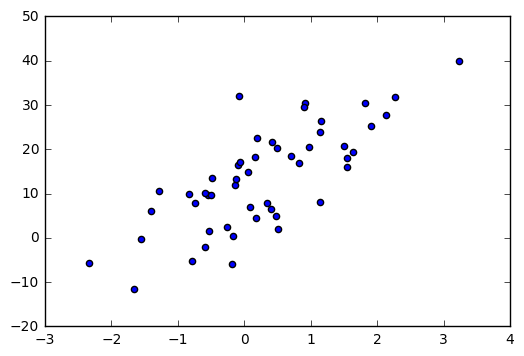

In [178]:
x, y = make_regression(n_features=1,  n_samples=50, noise=7, bias=10)
plt.scatter(x,y)
plt.show()

Starting gradient descent at b0 = 0, b1 = 0
Running...
After 1000 iterations b0 = 9.255816617768103, b1 = 7.436412016966977
errors moved from 155.4420449902514 to 30.328802297150002


C:\Users\m_ashour\Anaconda3\lib\site-packages\ipykernel\__main__.py:49: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


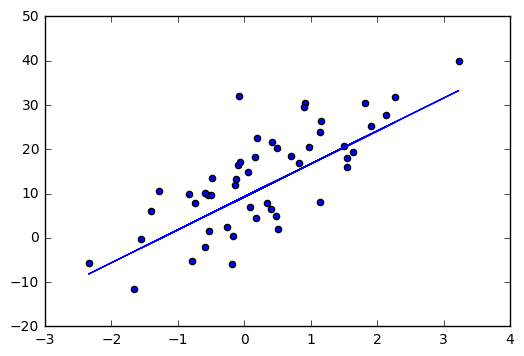

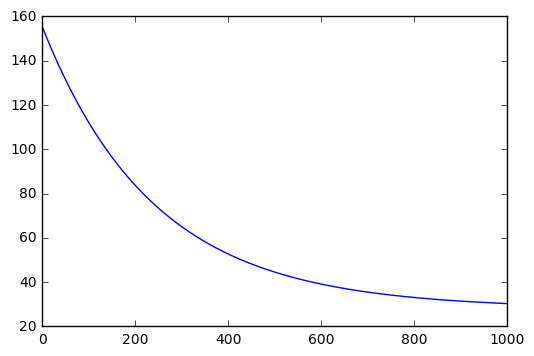

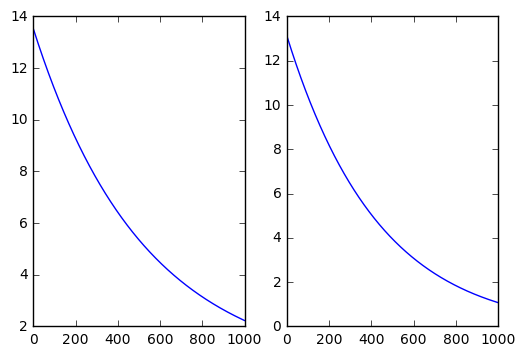

155.44204499 30.3288022972


In [179]:
reg1 = LinearRegression()
reg1.train(x,y,num_itrs=1000, alpha = .0015)
yprid1 = reg1.predict(x)
plt.scatter(x,y)
plt.plot(x,yprid1)
plt.show()
reg1.plot_errors()
reg1.plot_b0_b1_errors()
print(reg1.errors[0], reg1.errors[-1])

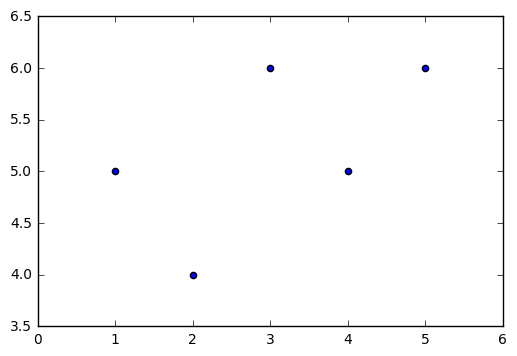

In [180]:
xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)
plt.scatter(xs,ys)
plt.show()

In [182]:
l2= LinearRegression()
l2.train(xs,ys, num_itrs=1000)
print(l2.b0, l2.b1)

Starting gradient descent at b0 = 0, b1 = 0
Running...
After 1000 iterations b0 = 3.578721261638848, b1 = 0.49978264478427553
errors moved from 11.076165999999999 to 0.23734666564005832
3.57872126164 0.499782644784


C:\Users\m_ashour\Anaconda3\lib\site-packages\ipykernel\__main__.py:49: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead


In [183]:
pred = l2.predict(xs)

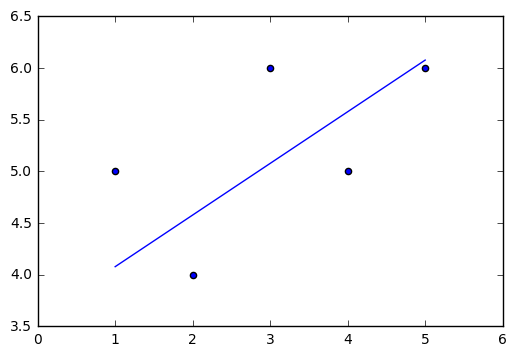

In [184]:
plt.scatter(xs,ys)
plt.plot(xs,pred)
plt.show()